In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

IMPORT TRAINING AND TESTING SETS

In [19]:
train = pd.read_csv('csv_files/train.csv')
test = pd.read_csv('csv_files/test.csv')

In [20]:
train.shape, test.shape

((7352, 564), (2947, 564))

In [21]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [22]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [23]:
# get x_train and y_train from train
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis = 1)
y_train = train.ActivityName

In [24]:
#get x_test and y_test from test
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis = 1)
y_test = test.ActivityName

In [25]:
X_train.shape, y_train.shape

((7352, 561), (7352,))

In [26]:
X_test.shape, y_test.shape

((2947, 561), (2947,))

PLOT CONFUSION MATRIX

In [27]:
labels = ['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# function to plot confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=True, title='Normalized Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
# generic function to run any model specified
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True):
    results = dict() # to store results at various phases
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print("Training time :", train_end_time - train_start_time)
    
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    results['predicted'] = y_pred
    print('testing time :', test_start_time - test_end_time)
    
    # calculate overall accuracy of model
    accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print("ACCURACY : ", accuracy)
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    print("CONFUSION MATRIX : ")
    print(cm)
    
    # plot normalized confusion matrix
    plt.figure(figsize = (8,8))
    plt.grid(b = False)
    plot_confusion_matrix(cm,classes=class_labels)
    plt.show()
    
    # get classification report
    print("Classification report :")
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results

METHOD TO PRINT GRIDSEARCH ATTRIBUTES

In [29]:
def print_grid_search_attributes(model):
    # estimator that gave highest score among all the estimators formed in grid search
    print("Best estimator :", model.best_estimator_)
    
    # parameters that gave the best results while performing grid search
    print("Best parameters :", model.best_params_)
    
    # number of cross validation splits
    print("No of cross validation splits :", model.n_splits_)
    
    # avg cross validated score of the best estimator, from the grid search
    print("Avg cross validate scores of best estimators :", model.best_score_)

### LOGISTIC REGRESSION

In [30]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import itertools

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 14.3min finished
C:\ANACONDAUPDATED\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training time : 0:14:30.937607
testing time : -1 day, 23:59:59.984617
ACCURACY :  0.9626739056667798
CONFUSION MATRIX : 
[[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


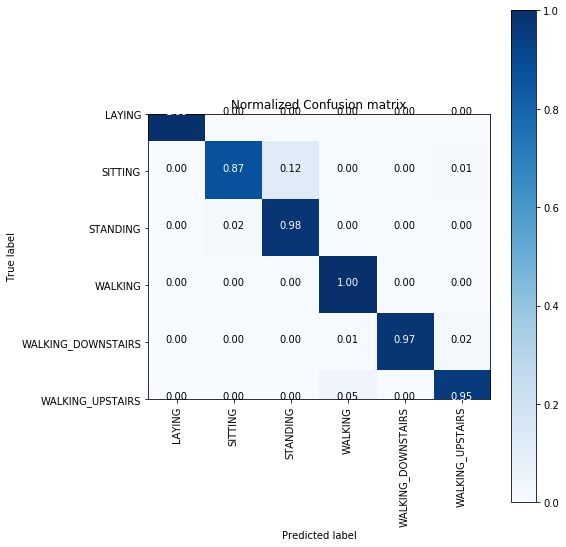

Classification report :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [35]:
# start grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2', 'l1'], 'solver':['liblinear', 'saga']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid = parameters, cv=3, verbose = 1, n_jobs = -1)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [30]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

Best estimator : LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best parameters : {'C': 30, 'penalty': 'l2'}
No of cross validation splits : 3
Avg cross validate scores of best estimators : 0.9461371055495104


### LINEAR SVC WITH GRID SEARCH

In [32]:
from sklearn.svm import LinearSVC

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\ANACONDAUPDATED\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.3min finished
C:\ANACONDAUPDATED\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training time : 0:01:24.788407
testing time : 0:00:00
ACCURACY :  0.9555480149304377
CONFUSION MATRIX : 
[[537   0   0   0   0   0]
 [  2 385  99   0   0   5]
 [  0   2 529   1   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  13   1 457]]


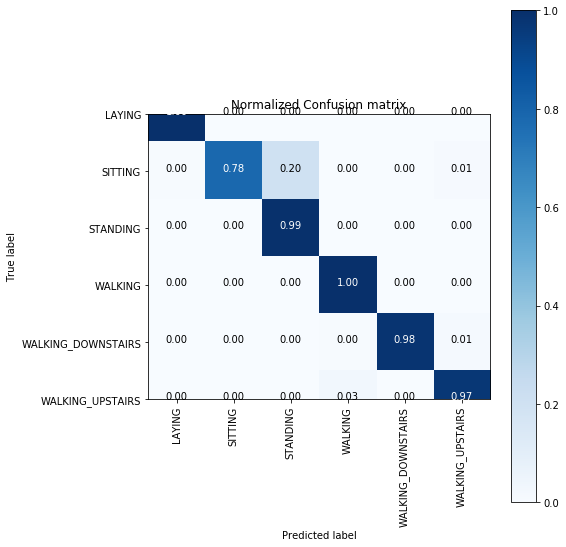

Classification report :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.99      0.78      0.88       491
          STANDING       0.84      0.99      0.91       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.95      2947



In [35]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [39]:
print_grid_search_attributes(lr_svc_grid_results['model'])

Best estimator : LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)
Best parameters : {'C': 8}
No of cross validation splits : 3
Avg cross validate scores of best estimators : 0.9468171926006529


### KERNEL SVM WITH GRID SEARCH

C:\ANACONDAUPDATED\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training time : 0:05:06.479497
testing time : -1 day, 23:59:56.235748
ACCURACY :  0.9626739056667798
CONFUSION MATRIX : 
[[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


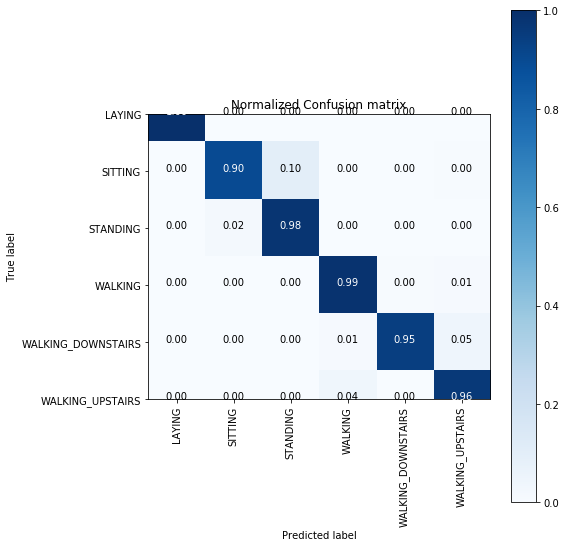

Classification report :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [38]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [39]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

Best estimator : SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters : {'C': 16, 'gamma': 0.0078125}
No of cross validation splits : 3
Avg cross validate scores of best estimators : 0.9440968443960827


### DECISION TREES WITH GRID SEARCH CV

C:\ANACONDAUPDATED\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training time : 0:00:13.682457
testing time : 0:00:00
ACCURACY :  0.8629114353579912
CONFUSION MATRIX : 
[[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  18 341  61]
 [  0   0   0  78  24 369]]


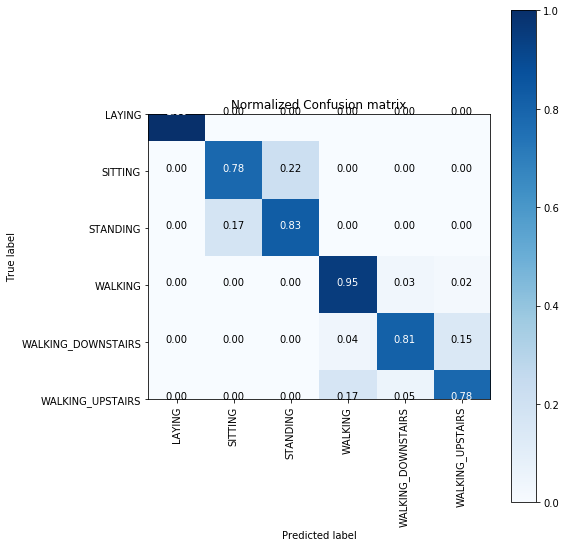

Classification report :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.81      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

Best estimator : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
             

In [40]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

### RANDOM FOREST CLASSIFIER WITH GRID SEARCH

C:\ANACONDAUPDATED\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training time : 0:07:39.977187
testing time : -1 day, 23:59:59.920996
ACCURACY :  0.9097387173396675
CONFUSION MATRIX : 
[[537   0   0   0   0   0]
 [  0 419  72   0   0   0]
 [  0  54 478   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0  37 338  45]
 [  0   0   0  40   6 425]]


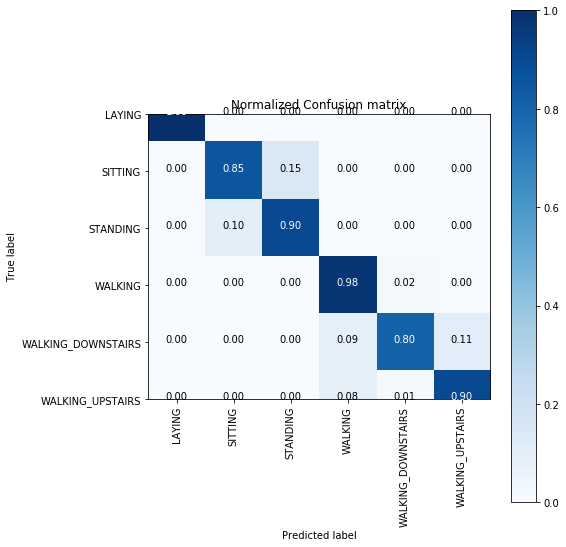

Classification report :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.85      0.87       491
          STANDING       0.87      0.90      0.88       532
           WALKING       0.86      0.98      0.92       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947

Best estimator : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimato

In [41]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

### GRADIENT BOOSTED DECISION TREES WITH GRID SEARCH

C:\ANACONDAUPDATED\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training time : 4:39:55.174200
testing time : -1 day, 23:59:59.790438
ACCURACY :  0.9243298269426535
CONFUSION MATRIX : 
[[537   0   0   0   0   0]
 [  0 402  87   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 482   7   7]
 [  0   0   0   7 371  42]
 [  0   1   0  28   5 437]]


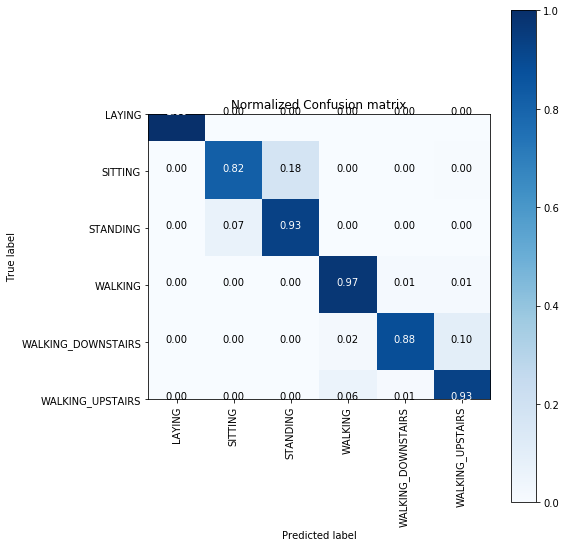

Classification report :
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.82      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

Best estimator : GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
  

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

### COMPARING ALL MODELS

In [42]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 95.55%       4.445% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.29%      13.71% 
Random Forest       : 90.97%      9.026% 
GradientBoosting DT : 92.43%      7.567% 


We can choose Logistic Regression, Linear SVC or RBF SVM classifier as the final model.
Tree based models give less accurate results.

In [52]:
# save all the models 
import pickle
pickle.dump(log_reg_grid_results['model'] ,open('models/logistic_regression_model.pkl', 'wb'))
pickle.dump(lr_svc_grid_results['model'] ,open('models/linear_svc_model.pkl', 'wb'))
pickle.dump(rbf_svm_grid_results['model'] ,open('models/svm_rbf_model.pkl', 'wb'))
pickle.dump(dt_grid_results['model'] ,open('models/dec_tree_model.pkl', 'wb'))
pickle.dump(rfc_grid_results['model'] ,open('models/rand_forest_model.pkl', 'wb'))
pickle.dump(gbdt_grid_results['model'] ,open('grad_boosted_dec_tree_model.pkl', 'wb'))

In [43]:
# end of notebook 2